### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes
from model_evaluation import evaluate_classifiers, evaluation_pipeline, get_number_of_samples_table

### Data loading

In [19]:
manip_category = 'pump_and_dump'
energy_threshold = 0.75
use_cone = True

manip_features = data_loading(manip_category, energy_threshold, use_cone)

### Visualization

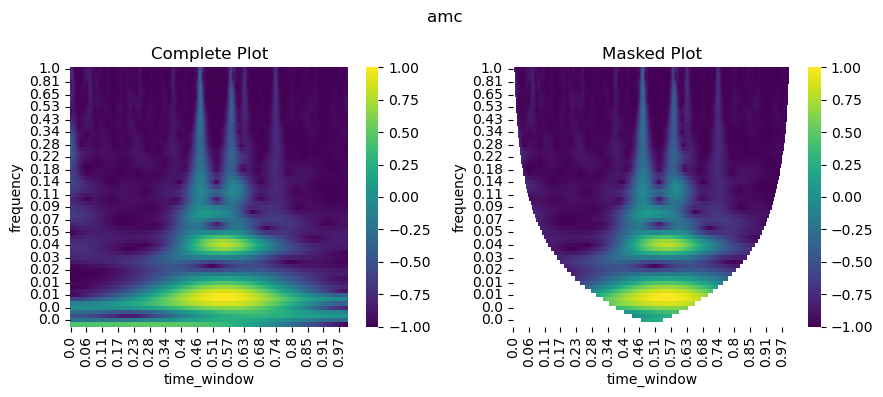

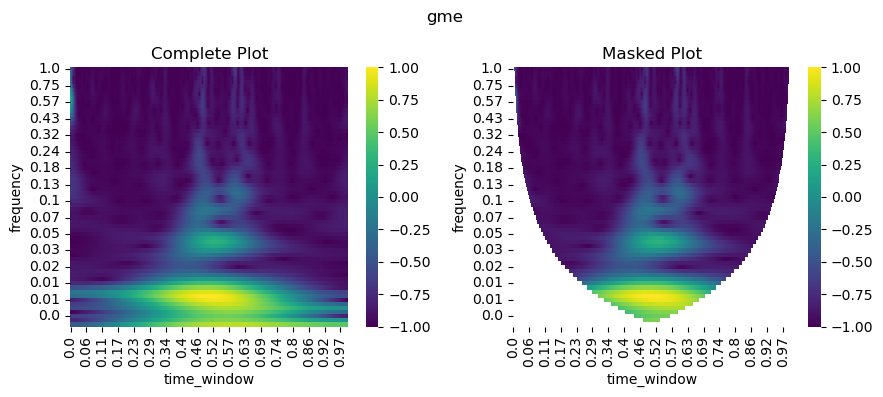

In [20]:
for stock_name, stock_dict in manip_features.items():
    color_plot(stock_dict, stock_name)

In [22]:
stock_name = 'amc'
plot_against = 'frequency'
hue_var = 'target'

plot3d_dataset(manip_features[stock_name]['features'], stock_name, plot_against, hue_var)

### Random Sampling and Splitting

In [23]:
X_train_all, y_train, X_val_all, y_val, X_test_all, y_test = random_sampling(manip_features[stock_name]['features'], 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, [1, 2, 3]]
X_val = X_val_all[:, [1, 2, 3]]
X_test = X_test_all[:, [1, 2, 3]]

### Distribution Visualization

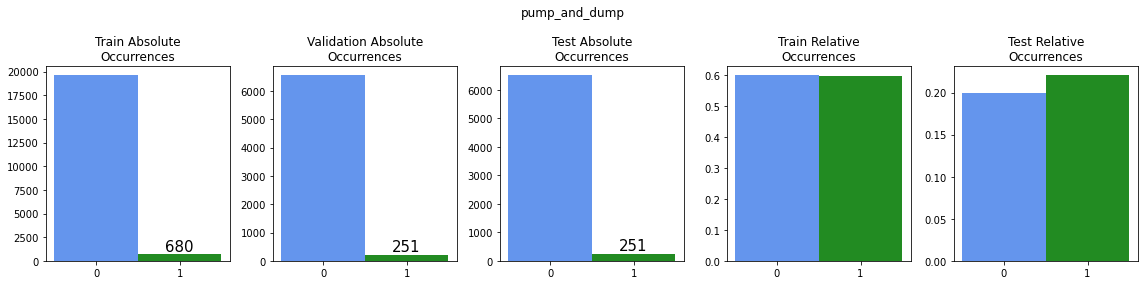

In [24]:
plot_target_classes(y_train, y_val, y_test, manip_category)

In [39]:
plot_against = 'modulus'

plot3d_dataset(X_train_all, '3D Plot Test Dataset', plot_against, target_var=y_train)

TypeError: plot3d_dataset() missing 1 required positional argument: 'hue_var'

### Model Benchmarking

In [43]:
gen_train_error_pair = [(0.1, 0.1), (0.05, 0.05), (0.01, 0.01)]

get_number_of_samples_table(gen_train_error_pair, 3, depth=3, pol_degree=2)

,logistic_regression,svm_linear,svm_polynomial,svm_rbf,decision_tree
"(epsilon, delta)",,,,,
"(0.1, 0.1)",37.0,37.0,43.0,inf,742.0
"(0.05, 0.05)",88.0,88.0,99.0,inf,3063.0
"(0.01, 0.01)",600.0,600.0,656.0,inf,82138.0


In [52]:
gen_error = 0.01
train_error = 0.01
sampling_mode = 'independent'

classifiers_errors = evaluation_pipeline(feature_matrix, 3, 'decision_tree', gen_error, train_error, sampling_mode, depth=3)

Required samples: 82138, available samples: 35280.
Not enough samples available, the training procedure is not adequate, however, will return standard 60$ for illustration purposes
21168 of the data are used for training.
7056 of the data are used for validation.
7056 of the data are used for testing.
decision_tree
Label 0.0 -> Train error 0.04383975812547241, Val error 0.04832766439909297, Test error 0.044359410430839005
Label 1.0 -> Train error 0.04383975812547241, Val error 0.04832766439909297, Test error 0.044359410430839005


In [10]:
classifiers_dict = {
    'decision_tree': DecisionTreeClassifier(max_depth=3),
    'svm_linear': SVC(kernel='linear', C=1.0),
    'svm_poly': SVC(kernel='poly', C=1.0, degree=30),
    'svm_rbf': SVC(kernel='rbf', C=1.0),
    'logistic_regression': LogisticRegression(solver='lbfgs', C=1.0)
}

classifiers_errors = evaluate_classifiers(classifiers_dict, X_train, y_train, X_val, y_val, X_test, y_test)

decision_tree
Label One: train error: 0.49691358024691357, val error: 0.5555555555555556, test error: 0.4742268041237113
Label Zero: train error: 0.0008020050125313594, val error: 0.001052631578947416, test error: 0.0012010208677375456
svm_linear
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_poly
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
svm_rbf
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
logistic_regression
Label One: train error: 1.0, val error: 1.0, test error: 1.0
Label Zero: train error: 0.0, val error: 0.0, test error: 0.0
